# MATH7002 Advanced Statistical methods
## Worksheet 8

1. Consider the following 2 variable linear program.

\begin{align*}
\text{Maximize  }&& z=4x_1+6x_2 &\\
\text{subject to  }&&  6x_1+5x_2 &\le 60\\
&&x_1&\le 7\\
&&x_2 &\le 7\\
&&x_1,x_2 &\ge 0\\
\end{align*}

a. Sketch the feasible region.

b. Find the optimal solution.
    

In [1]:
library(lpSolve)
# Objective Coefficients
objective <- c(4, 6)

# Constrain Matrix
constraints <- matrix(c(6, 5,
                        1, 0,
                        0, 1), 
                      nrow = 3, byrow = TRUE)

# Constrain Directions
directions <- c("<=", "<=", "<=")

# Right Handside 
rhs <- c(60, 7, 7)

solution <- lp("max", objective, constraints, directions, rhs)

solution
solution$solution   # Optimal Solution
solution$objval     # The maximal obejective value

Success: the objective function is 58.66667 

[1] 4.166667 7.000000

[1] 58.66667

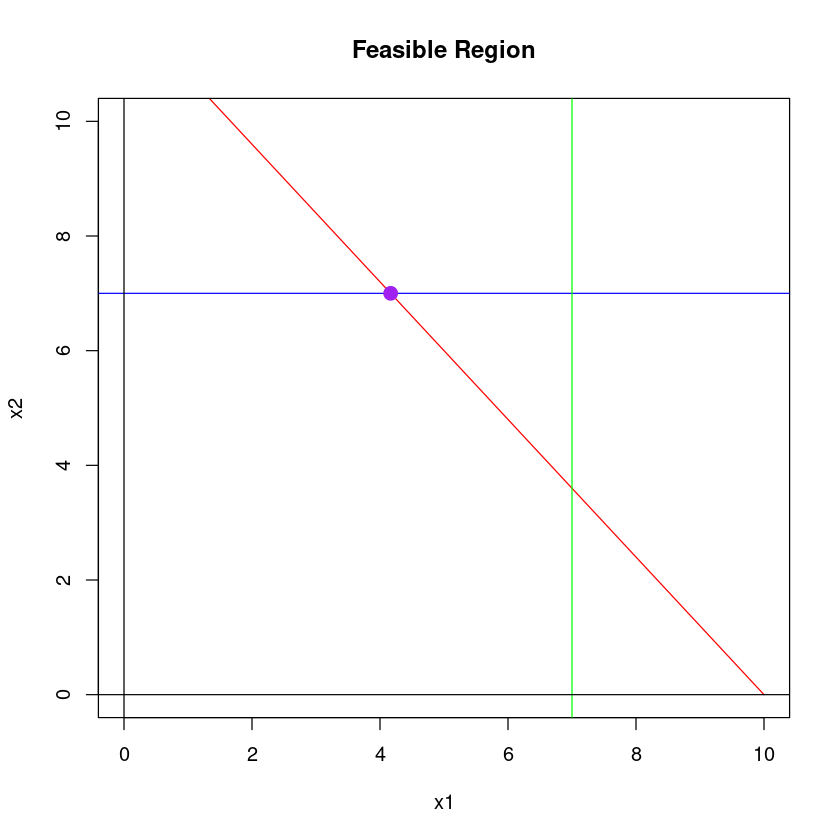

In [2]:
x1 <- seq(0, 10, 0.1)
line1 <- (60 - 6*x1)/5  
line1[line1 < 0] <- NA

plot(x1, line1, type="l", col="red", ylim=c(0,10),
     xlab="x1", ylab="x2", main="Feasible Region")
abline(h=7, col="blue") 
abline(v=7, col="green") 
abline(h=0, col="black")
abline(v=0, col="black")

points(solution$solution[1], solution$solution[2], col="purple", pch=19, cex=1.5)


In [3]:
A <- matrix( c(6,5,
               1,0,
               0,1), ncol=2, byrow=TRUE)
b <- c(60,7,7)
c <- c(4,6)

In [4]:
require(linprog)

Loading required package: linprog



In [6]:
solveLP(c, b, A, maximum=TRUE, verbose=4)

[1] "initial Tableau"
     1  2 S 1 S 2 S 3 P0
1    6  5   1   0   0 60
2    1  0   0   1   0  7
3    0  1   0   0   1  7
Z-C -4 -6   0   0   0  0

Pivot Column: 2 ( 2 )
Pivot Row: 3 ( 3 )

     1 2 S 1 S 2 S 3 P0
1    6 0   1   0  -5 25
2    1 0   0   1   0  7
2    0 1   0   0   1  7
Z-C -4 0   0   0   6 42

Pivot Column: 1 ( 1 )
Pivot Row: 1 ( 1 )

    1 2        S 1 S 2        S 3        P0
1   1 0  0.1666667   0 -0.8333333  4.166667
2   0 0 -0.1666667   1  0.8333333  2.833333
2   0 1  0.0000000   0  1.0000000  7.000000
Z-C 0 0  0.6666667   0  2.6666667 58.666667




Results of Linear Programming / Linear Optimization

Objective function (Maximum): 58.6667 

Iterations in phase 1: 0
Iterations in phase 2: 2
Solution
      opt
1 4.16667
2 7.00000

Basic Variables
        opt
1   4.16667
2   7.00000
S 2 2.83333

Constraints
    actual dir bvec    free     dual dual.reg
1 60.00000  <=   60 0.00000 0.666667 25.00000
2  4.16667  <=    7 2.83333 0.000000  2.83333
3  7.00000  <=    7 0.00000 2.666667  3.40000

All Variables (including slack variables)
        opt cvec    min.c    max.c      marg marg.reg
1   4.16667    4  0.00000 7.200000        NA       NA
2   7.00000    6  3.33333      Inf        NA       NA
S 1 0.00000    0     -Inf 0.666667 -0.666667     25.0
S 2 2.83333    0 -3.20000 4.000000  0.000000       NA
S 3 0.00000    0     -Inf 2.666667 -2.666667      3.4


2. Consider the linear programming problem below.

\begin{align*}
\text{Maximise} &&  z = 20x_1 + 15x_2 + 10x_3&  \\
\text{Subject to} && 2x_1+x_2+3x_3 & \le 42\\
&&2x_1+x_2+2x_3 & \le 40\\
&&x_1+2x_2+x_3 & \le 45\\
&&x_1,x_2,x_3 & \ge 0
\end{align*}

Using the simplex method find the optimal values of $x_1$,
  $x_2$, $x_3$ and $z$.

3.  At a preschool lunch is provided. The following table shows the available food products.

In [1]:
dat = c(10,75,0,20,70,0, 
        70,100,50,60,150,100, 
        0,0,3,0,2,120, 
        3,4,0,1,8,1, 
        5,4,7,8,15,35) 
dat=matrix(dat, ncol=5)
library(kableExtra)   
colnames(dat) = c("Calories from Fat", "Total Calories", "Vitamin C (mg)", "Protein (g)", "Cost (c)")
rownames(dat) = c("Bread (1 slice)", "Peanut Butter (1 tbsp)", "Jam (1 tbsp)", "Cracker (1)",
                  "Milk (1 cup)", "Juice (1 cup)")
kable(dat, caption="")



Table: 

|                       | Calories from Fat| Total Calories| Vitamin C (mg)| Protein (g)| Cost (c)|
|:----------------------|-----------------:|--------------:|--------------:|-----------:|--------:|
|Bread (1 slice)        |                10|             70|              0|           3|        5|
|Peanut Butter (1 tbsp) |                75|            100|              0|           4|        4|
|Jam (1 tbsp)           |                 0|             50|              3|           0|        7|
|Cracker (1)            |                20|             60|              0|           1|        8|
|Milk (1 cup)           |                70|            150|              2|           8|       15|
|Juice (1 cup)          |                 0|            100|            120|           1|       35|

Each child should have 

+ between 400 and 600 calories
+ no more that 30% of calories from fat
+ at least 60mg of Vitamin C and 12g of protein
+ exactly 2 slices of bread
+ at least twice as much PB as Jam
+ at least one cup of liquid

Cost should minimised.

a. Write as a linear program

b. Solve
    